In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# set the working directory

indir = "/Volumes/data/data/seaflow/refilter/"
cruise = "SCOPE_1"

# open the sqlite db
dbfile = '%s%s/%s.db' % (indir, cruise, cruise)

db = sqlite3.connect(dbfile)
filt = pd.read_sql_query("SELECT * from filter", db)

# find the newest filter id
filtid = filt['id'][len(filt)-1]

opp = pd.read_sql_query("SELECT * from opp", db)
opp = opp.loc[opp['filter_id']== filtid]

print opp.columns

Index([u'cruise', u'file', u'all_count', u'opp_count', u'evt_count',
       u'opp_evt_ratio', u'notch1', u'notch2', u'offset', u'origin', u'width',
       u'fsc_small_min', u'fsc_small_max', u'fsc_small_mean', u'fsc_perp_min',
       u'fsc_perp_max', u'fsc_perp_mean', u'fsc_big_min', u'fsc_big_max',
       u'fsc_big_mean', u'pe_min', u'pe_max', u'pe_mean', u'chl_small_min',
       u'chl_small_max', u'chl_small_mean', u'chl_big_min', u'chl_big_max',
       u'chl_big_mean', u'filter_id'],
      dtype='object')


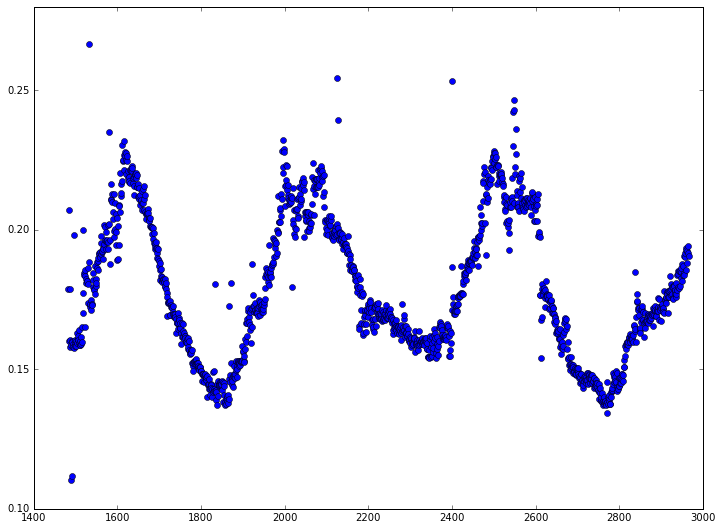

In [3]:
# make a plot of the evt/total particles
fig = plt.figure(1, figsize=(12,9))

plt.plot(opp['evt_count']/opp['all_count'],'o')
plt.show()

In [4]:
# fit a straight line to the evt/total ratio
# find 95% CI envelope and exclude data outside that envelope